In [5]:
import geopandas as gpd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import shapely.wkt
import shapely.geometry
import pandas as pd
import shapely.geometry.multipolygon as sh

In [6]:
test = xr.open_dataset('CDS_Data\\2020.nc')
print(test)

<xarray.Dataset> Size: 59MB
Dimensions:               (x: 8, y: 15, time: 8832)
Coordinates:
  * x                     (x) int32 32B 98 99 100 101 102 103 104 105
  * y                     (y) int32 60B 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * time                  (time) datetime64[ns] 71kB 2019-12-31 ... 2021-01-0...
    lon                   (x) float64 64B ...
    lat                   (y) float64 120B ...
Data variables: (12/13)
    height                (y, x) float32 480B ...
    wnd100m               (time, y, x) float32 4MB ...
    wnd_azimuth           (time, y, x) float32 4MB ...
    roughness             (time, y, x) float32 4MB ...
    influx_toa            (time, y, x) float32 4MB ...
    influx_direct         (time, y, x) float32 4MB ...
    ...                    ...
    albedo                (time, y, x) float32 4MB ...
    solar_altitude        (time, y, x) float64 8MB ...
    solar_azimuth         (time, y, x) float64 8MB ...
    temperature           (time, y, x

In [7]:
## First, I try to create a bouadary of THialand for acquiring data##
thailandmap = gpd.read_file('assets\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
min_lon = thailandmap.unary_union.bounds[0]
max_lon = thailandmap.unary_union.bounds[2]
max_lat = thailandmap.unary_union.bounds[1]
min_lat = thailandmap.unary_union.bounds[3]

c:\Workstation\generationprofile_solarwind\env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\basna\AppData\Local\Temp\ipykernel_7060\3569130382.py:4: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  min_lon = thailandmap.unary_union.bounds[0]
C:\Users\basna\AppData\Local\Temp\ipykernel_7060\3569130382.py:5: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  max_lon = thailandmap.unary_union.bounds[2]
C:\Users\basna\AppData\Local\Temp\ipykernel_7060\3569130382.py:6: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method inst

In [11]:
print(test.time)

<xarray.DataArray 'time' (time: 8832)> Size: 71kB
array(['2019-12-31T00:00:00.000000000', '2019-12-31T01:00:00.000000000',
       '2019-12-31T02:00:00.000000000', ..., '2021-01-01T21:00:00.000000000',
       '2021-01-01T22:00:00.000000000', '2021-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 71kB 2019-12-31 ... 2021-01-01T23:00:00


(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

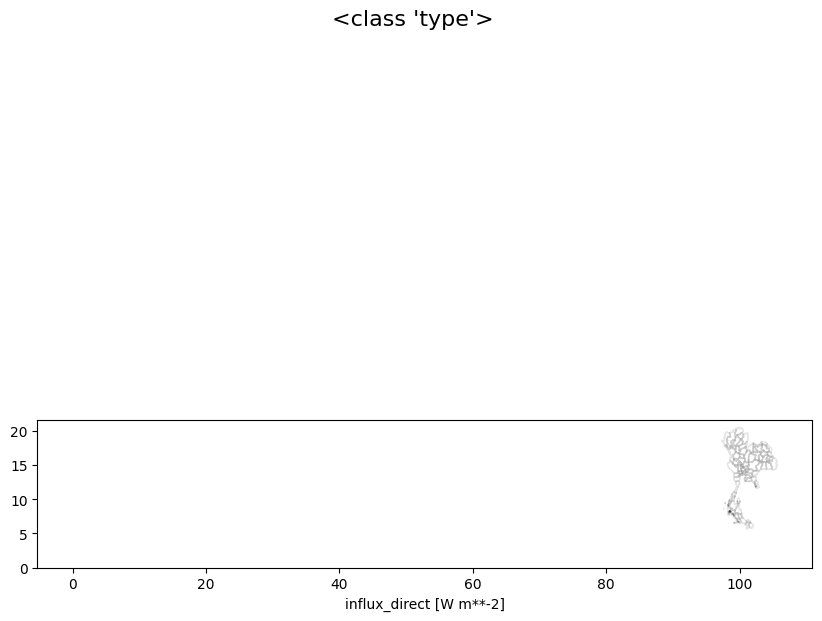

In [13]:
fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle(str(type), fontsize=16)
thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0,alpha = 0.1)
test['influx_direct'].where(test.time== '2019-12-31T12:00:00.000000000').plot(ax = ax,zorder = 1)